In [1]:
# There are 14 attributes in each case of the dataset. They are:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population

## The target variable
# MEDV - Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import norm

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
all_data=pd.DataFrame(boston['data'])
labels=pd.DataFrame(boston['target'])

In [5]:
all_data.columns=boston.feature_names

In [6]:
labels.columns=['MEDV']

In [7]:
all_data=pd.concat([all_data, labels], axis=1)

In [8]:
all_data

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [9]:
all_data.shape

(506, 14)

### By the looks of it, it looks like all variables are numerical, but let us test

In [10]:
all_data.describe().shape

(8, 14)

### Yes indeed. Since describe shows only numerical columns, the column count matches, so we have all numerical columns

In [11]:
all_data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### All columns have a count of 506 which is the size of the dataset, which means that we have no missing values. Wonderful.

#### Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

#### CRIM seems to have a very high skew, possible outlier?
#### ZN, CHAS has a 50% of 0, CHAS being a variable with 1 or 0 probably has mostly 0's
#### RAD 50% is pretty far off from the mean
#### There is a reasonable skew in other columns too, but not as prominent as these above.

In [12]:
all_data.columns[all_data.isnull().any()] ### Expecting no missing values


Index([], dtype='object')

In [13]:
all_data.select_dtypes(exclude=[np.number]).columns ### Expecting no non numerical columns

Index([], dtype='object')

### Let us start visualizing data to get some insight into our observations made using describe

In [2]:
sns.jointplot(all_data['MEDV'], all_data['CRIM'])

NameError: name 'sns' is not defined

In [15]:
all_data['MEDV'].value_counts().sort_values()

13.0     1
28.0     1
33.0     1
14.2     1
16.0     1
26.5     1
17.9     1
14.8     1
5.6      1
18.0     1
9.7      1
14.0     1
12.5     1
27.0     1
17.6     1
32.5     1
16.4     1
37.9     1
37.0     1
17.0     1
36.4     1
25.1     1
8.7      1
7.4      1
16.3     1
28.5     1
48.8     1
44.0     1
32.9     1
46.0     1
        ..
19.9     4
18.9     4
23.0     4
24.8     4
20.4     4
23.3     4
19.5     4
23.7     4
18.5     4
13.1     4
22.9     4
20.1     5
19.6     5
19.3     5
15.6     5
21.4     5
21.2     5
20.0     5
17.8     5
23.9     5
22.6     5
22.2     5
13.8     5
19.4     6
20.6     6
22.0     7
21.7     7
23.1     7
25.0     8
50.0    16
Name: MEDV, Length: 229, dtype: int64

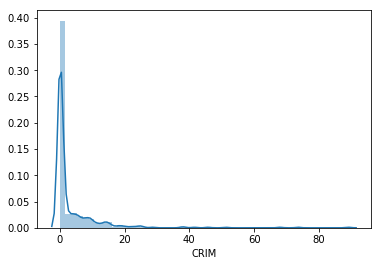

In [16]:
sns.distplot(all_data['CRIM'])

### Most rows show very low value for Crime rate

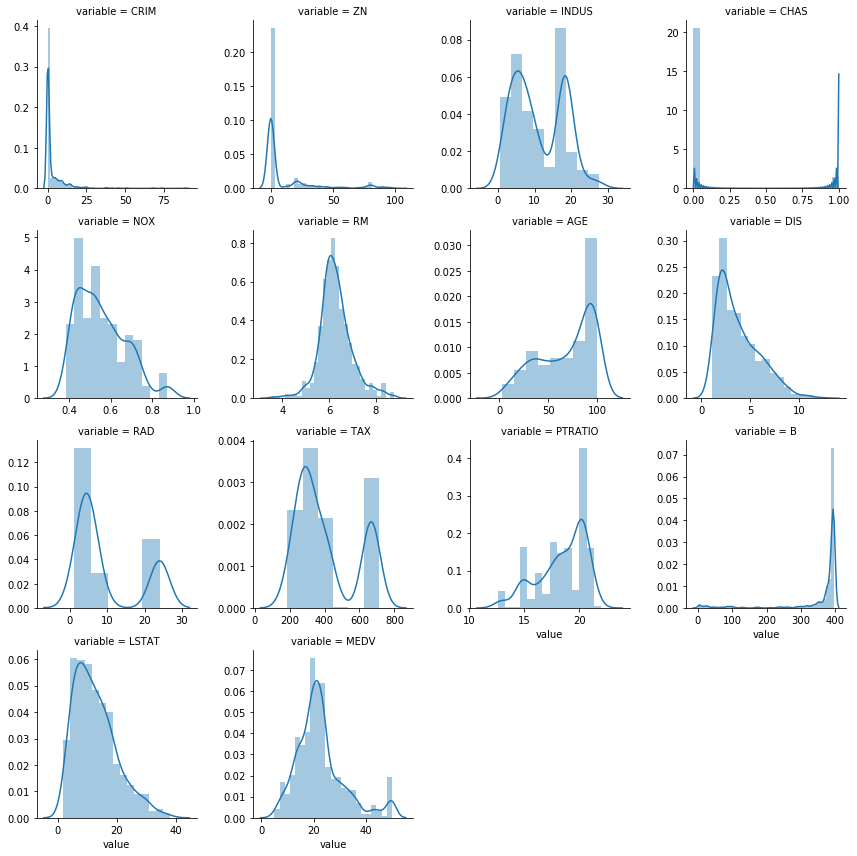

In [17]:
### Let us look at the distribution for all columns
num = [f for f in all_data.columns if all_data.dtypes[f] != 'object']

nd = pd.melt(all_data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

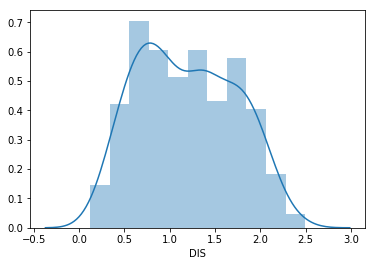

In [18]:
sns.distplot(np.log(all_data['DIS'])) ### Log transformation makes it more normal

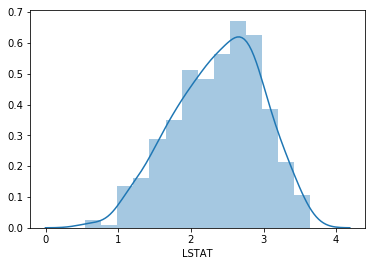

In [19]:
sns.distplot(np.log(all_data['LSTAT'])) ### Log transformation makes it more normal

In [20]:
all_data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

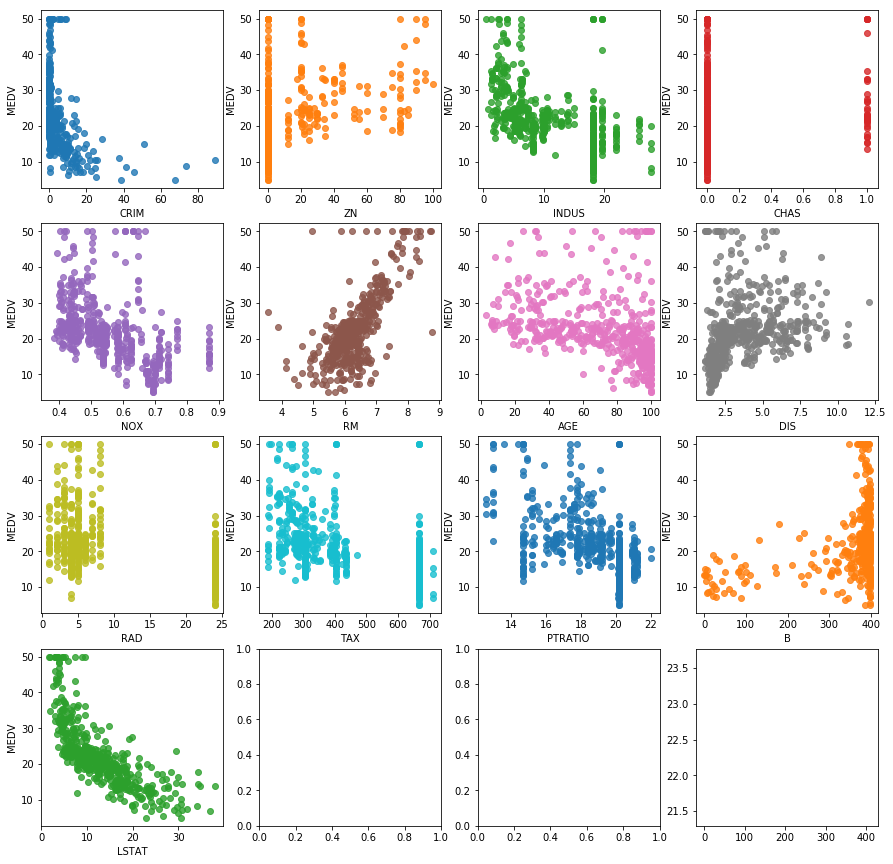

In [21]:
ig, axs = plt.subplots(ncols=4, nrows=4,figsize=(15,15))
sns.regplot(x='CRIM', y='MEDV', data=all_data, ax=axs[0][0], fit_reg=False)
sns.regplot(x='ZN', y='MEDV', data=all_data, ax=axs[0][1], fit_reg=False)
sns.regplot(x='INDUS', y='MEDV', data=all_data, ax=axs[0][2], fit_reg=False)
sns.regplot(x='CHAS', y='MEDV', data=all_data, ax=axs[0][3], fit_reg=False)
sns.regplot(x='NOX', y='MEDV', data=all_data, ax=axs[1][0], fit_reg=False)
sns.regplot(x='RM', y='MEDV', data=all_data, ax=axs[1][1], fit_reg=False)
sns.regplot(x='AGE', y='MEDV', data=all_data, ax=axs[1][2], fit_reg=False)
sns.regplot(x='DIS', y='MEDV', data=all_data, ax=axs[1][3], fit_reg=False)
sns.regplot(x='RAD', y='MEDV', data=all_data, ax=axs[2][0], fit_reg=False)
sns.regplot(x='TAX', y='MEDV', data=all_data, ax=axs[2][1], fit_reg=False)
sns.regplot(x='PTRATIO', y='MEDV', data=all_data, ax=axs[2][2], fit_reg=False)
sns.regplot(x='B', y='MEDV', data=all_data, ax=axs[2][3], fit_reg=False)
sns.regplot(x='LSTAT', y='MEDV', data=all_data, ax=axs[3][0], fit_reg=False)

In [22]:
del all_data['MEDV']

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2, random_state=20)

/Users/maxim/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
from sklearn.linear_model import LinearRegression
lasso=LinearRegression()

In [26]:
lasso.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred=lasso.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

4.0630473513517495